In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
# 한글 이슈 해결 - 로컬

import os
# import matplotlib.pyplot as plt

# mac
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')

# windows
else:
    plt.rc('font', family='Malgun Gothic')

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('data/E-Commerce Shipping Data/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- info()를 통해 결측치가 없는 것을 확인할 수 있음

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.describe(include=['O'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


# 2. 각 컬럼별 살펴보기 (subplot으로 해도 되긴 하는데.. 혹시 모르니 따로 뽑기 )

In [39]:
sns.set_palette('pastel')
sns.set_style('whitegrid')

## Warehouse_block 

In [23]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

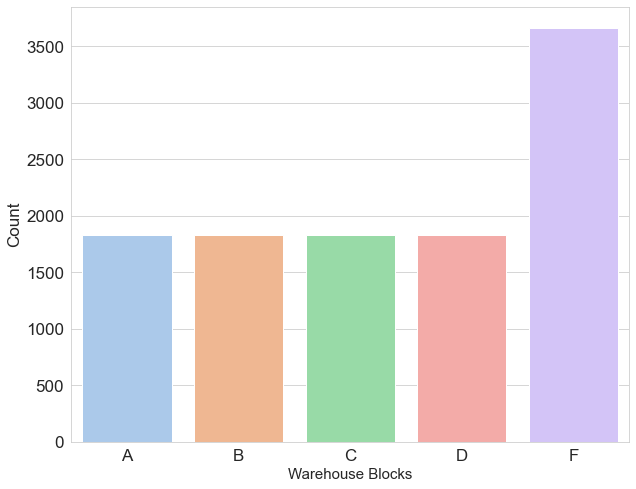

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Warehouse_block', order=['A', 'B', 'C', 'D', 'F'])
# plt.title("Distribution of Warehouse Blocks", fontsize=20)
plt.xlabel("Warehouse Blocks", fontsize=15)
plt.ylabel("Count", fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.show()

## Mode_of_Shipment

In [22]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

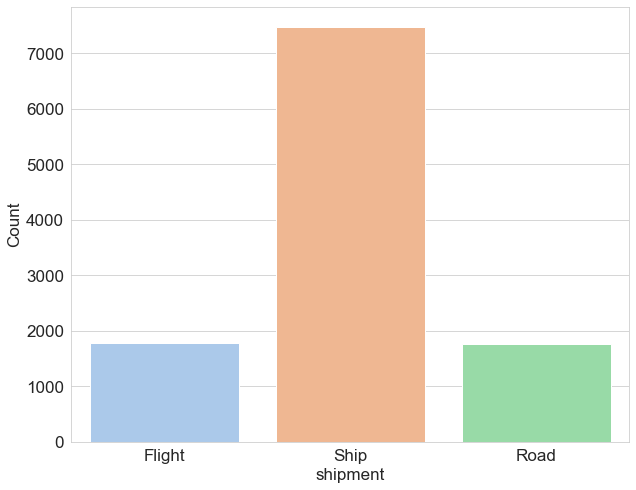

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Mode_of_Shipment')
# plt.title("Mode of shipment", fontsize=20)
plt.xlabel("shipment", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.show()

In [135]:
df['Mode_of_Shipment'].unique().tolist()

array(['Flight', 'Ship', 'Road'], dtype=object)

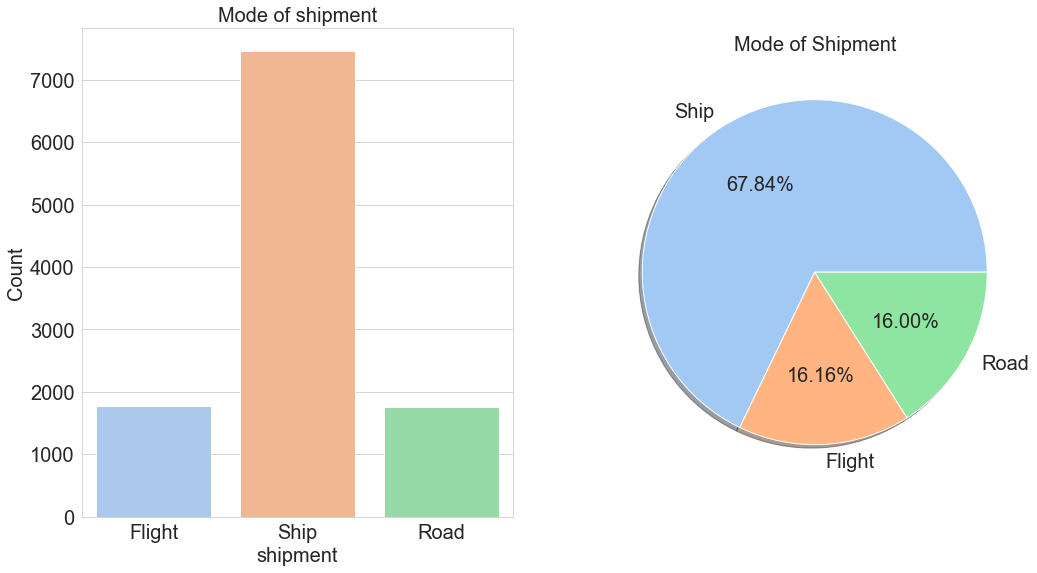

In [24]:
plt.figure(figsize=(17, 9))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Mode_of_Shipment')
plt.title("Mode of shipment", fontsize=20)
plt.xlabel("shipment", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(1, 2, 2)
mod = df['Mode_of_Shipment'].value_counts()
mod.plot.pie(autopct='%.2f%%', textprops={'fontsize': 20}, shadow=True)
plt.ylabel('')
plt.title('Mode of Shipment', fontsize=20)

plt.show()

## Customer_care_calls

In [11]:
df['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

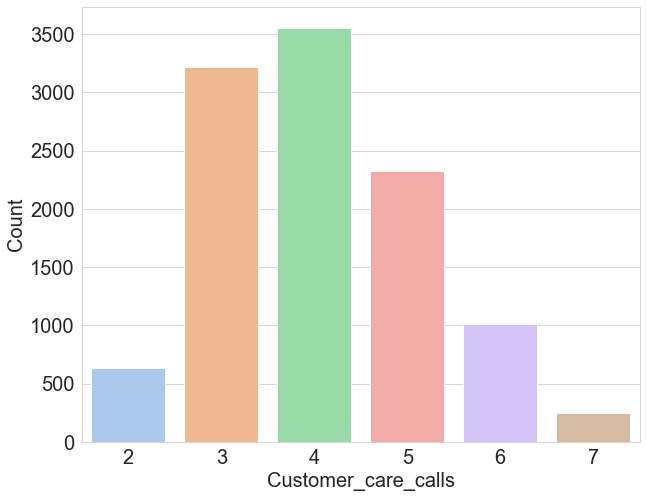

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Customer_care_calls')
# plt.title("Customer_care_callst", fontsize=20)
plt.xlabel('Customer_care_calls', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Customer rating

In [34]:
df['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

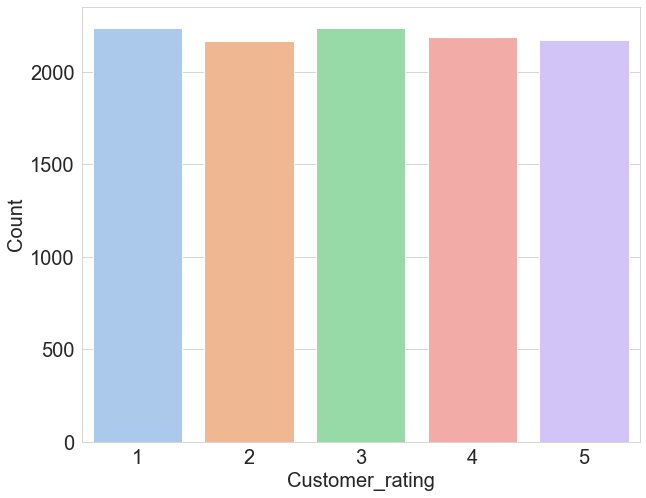

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Customer_rating')
# plt.title("Customer_rating", fontsize=20)
plt.xlabel('Customer_rating', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Prior_purchases

In [35]:
df['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

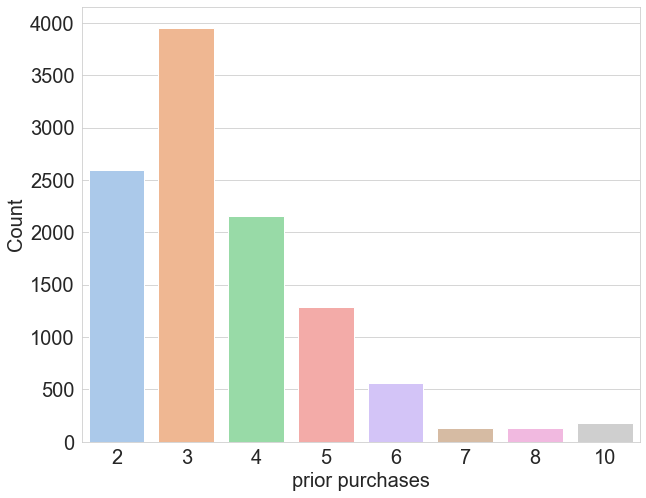

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Prior_purchases')
# plt.title("Prior_purchases", fontsize=20)
plt.xlabel('prior purchases', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Product_importance

In [37]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

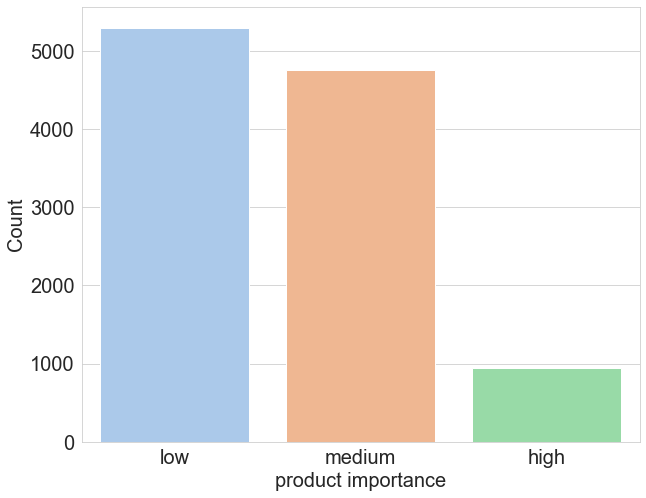

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_importance')
# plt.title("Product_importance", fontsize=20)
plt.xlabel('product importance', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Reached.on.Time_Y.N

In [37]:
df['Reached.on.Time_Y.N'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

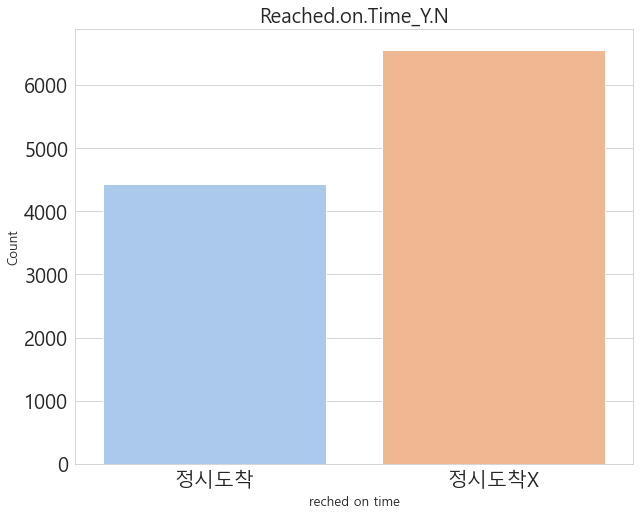

In [42]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Reached.on.Time_Y.N')
plt.title("Reached.on.Time_Y.N", fontsize=20)
plt.xticks(ticks=[0, 1], labels=['정시도착', '정시도착X'], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('reched on time', fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

## Gender

In [88]:
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

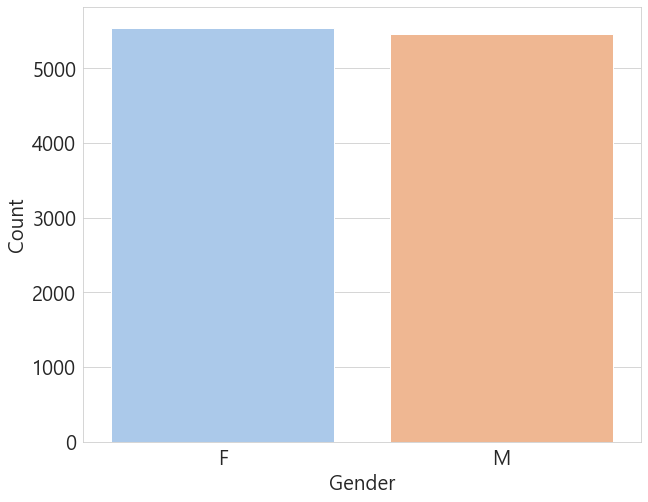

In [43]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Gender')
# plt.title("Gender", fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Cost of the product

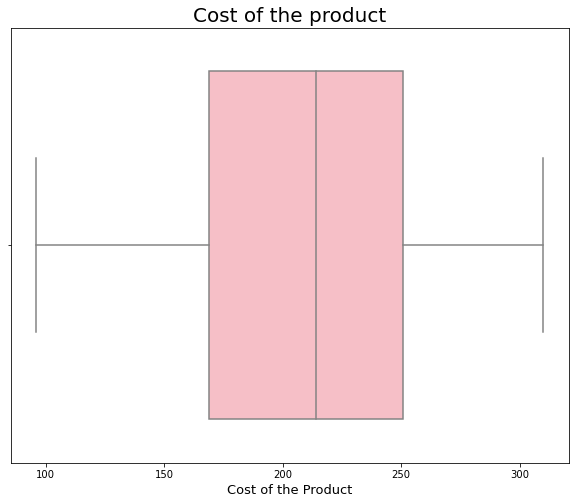

In [111]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Cost_of_the_Product', color='lightpink')
plt.title("Cost of the product", fontsize=20)
plt.xlabel('Cost of the Product', fontsize=13)
plt.show()

## Discount_offered

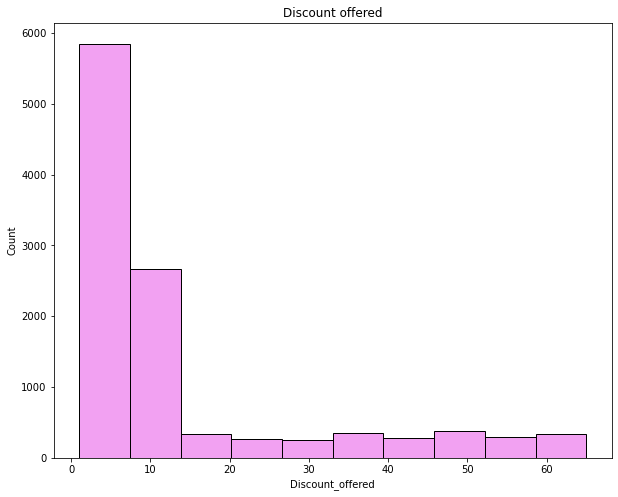

In [173]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Discount_offered'], bins=10, color='violet')
plt.title('Discount offered')
plt.show()

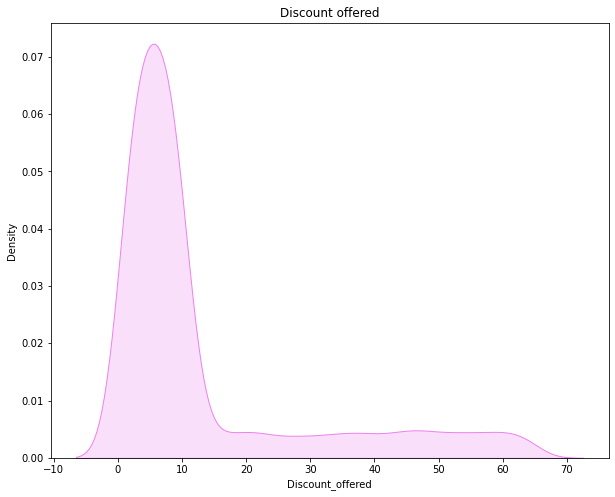

In [155]:
plt.figure(figsize=(10, 8))
sns.kdeplot(df['Discount_offered'], shade=True, color='violet')
plt.title('Discount offered')
plt.show()

In [158]:
df['Discount_offered'].max()

65

C:\Users\sebin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


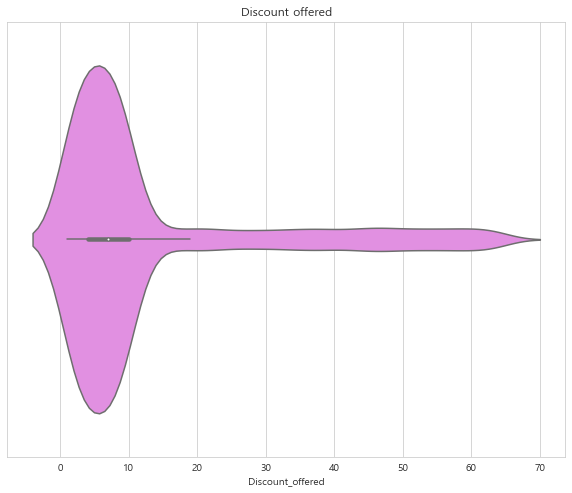

In [44]:
plt.figure(figsize=(10, 8))
sns.violinplot(df['Discount_offered'], color='violet')
plt.title('Discount offered')
plt.show()

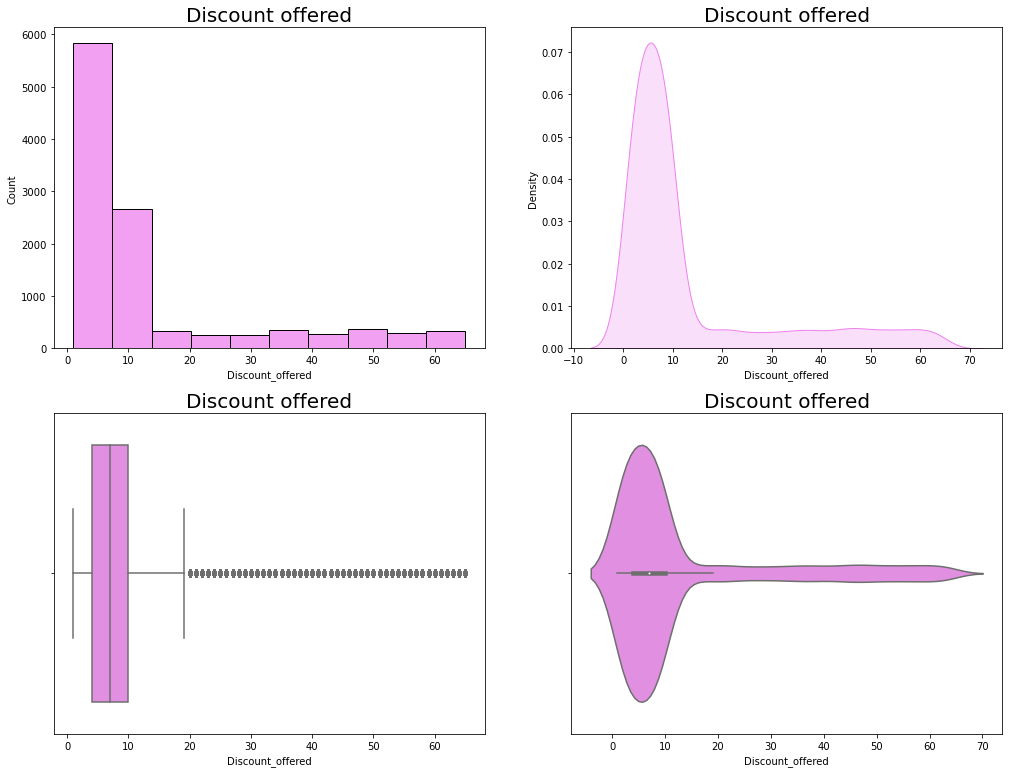

In [182]:
plt.figure(figsize=(17, 13))

plt.subplot(2, 2, 1)
sns.histplot(df['Discount_offered'], bins=10, color='violet')
plt.title("Discount offered", fontsize=20)

plt.subplot(2, 2, 2)
sns.kdeplot(df['Discount_offered'], shade=True, color='violet')
plt.title('Discount offered', fontsize=20)

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Discount_offered', color='violet')
plt.title("Discount offered", fontsize=20)

plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Discount_offered', color='violet')
plt.title('Discount offered', fontsize=20)

plt.show()

# feature간 상관관계

C:\Users\sebin\AppData\Local\Temp\ipykernel_4036\1165024220.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


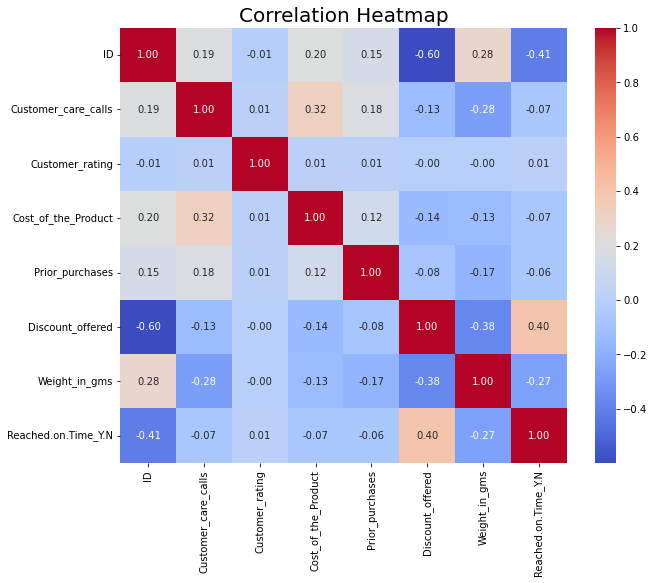

In [85]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f" )
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [52]:
corr

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


# 고객만족도 기준 컬럼간 관계 분석 - Customer_rating

In [194]:
shipping = df.copy()

## 창고별 고객 만족도 (warehouse_block)

###  Countplot
딱히 창고별로 고객 만족도의 차이가 커 보이지는 않음

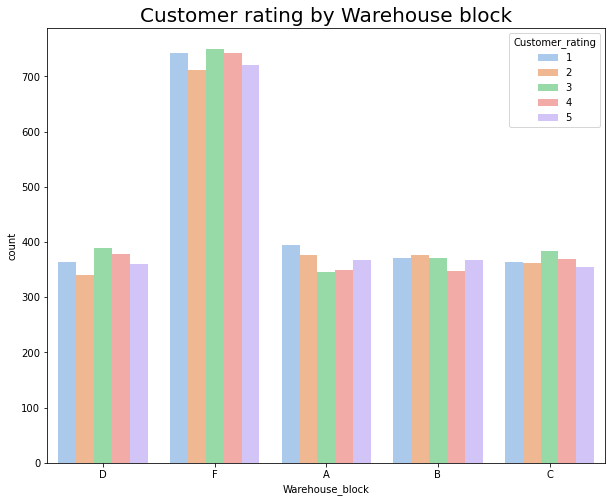

In [195]:
plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Warehouse_block'], hue = shipping['Customer_rating'])
plt.title('Customer rating by Warehouse block', fontsize=20)
plt.show()

### pie chart

In [ ]:
mod = df['Warehouse_block'].value_counts()
mod.plot.pie(autopct='%.2f%%', textprops={'fontsize': 15}, shadow=True)
plt.ylabel('')
plt.title('Mode of Shipment', fontsize=20)

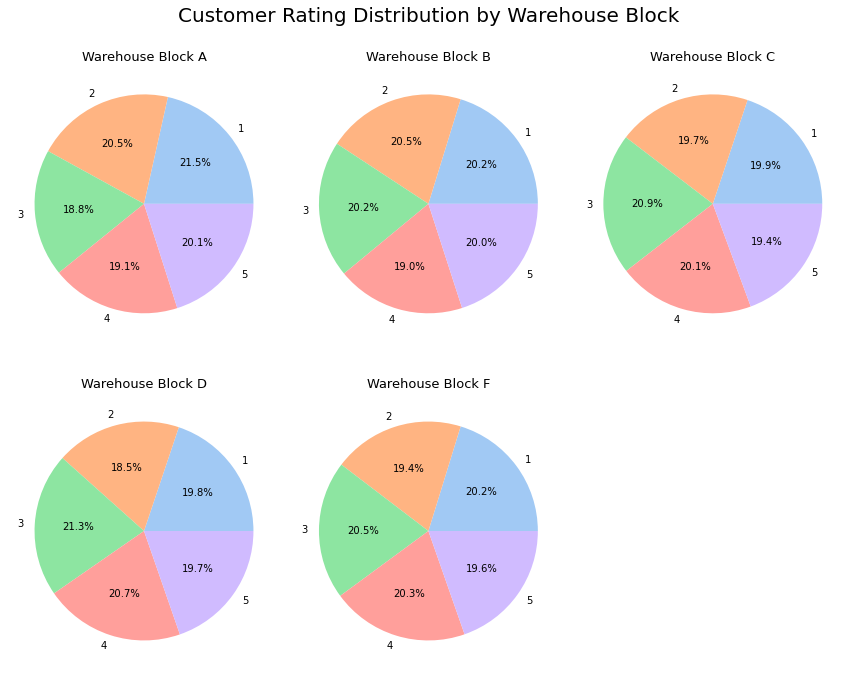

In [211]:
# 'Warehouse_block' 별 'Customer_rating'의 비율 계산
rating_counts = df.groupby('Warehouse_block')['Customer_rating'].value_counts(normalize=True).unstack()

# 파이 차트 그리기
plt.figure(figsize=(12, 10))
for i, (block, ratios) in enumerate(rating_counts.iterrows(), 1):
    plt.subplot(2, 3, i)
    plt.pie(ratios, labels=ratios.index, autopct='%1.1f%%')
    plt.title(f'Warehouse Block {block}', fontsize=13)

plt.suptitle('Customer Rating Distribution by Warehouse Block', fontsize=20)
plt.tight_layout()
plt.show()

## 배송방법 별 고객 만족도 (Mode_of_shipment)

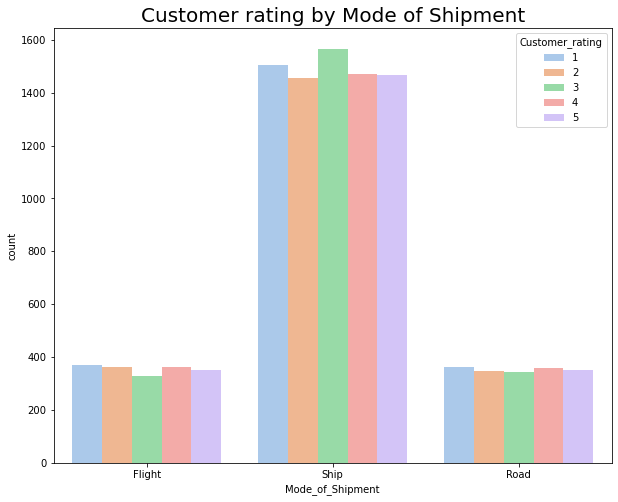

In [198]:
plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Mode_of_Shipment'], hue = shipping['Customer_rating'])
plt.title('Customer rating by Mode of Shipment', fontsize=20)
plt.show()

## 문의전화 횟수별 고객 만족도

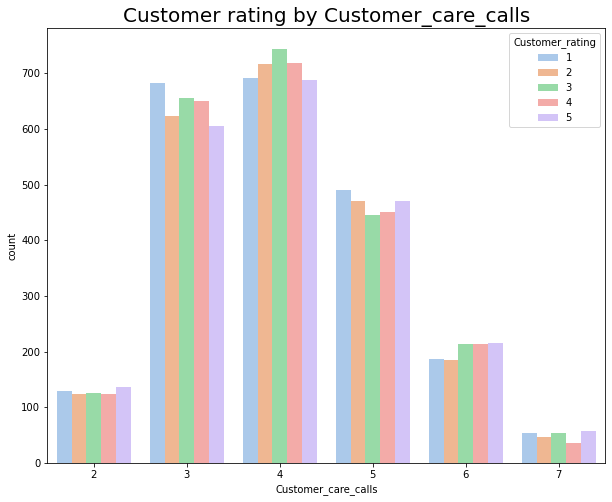

In [199]:
plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Customer_care_calls'], hue = shipping['Customer_rating'])
plt.title('Customer rating by Customer_care_calls', fontsize=20)
plt.show()

## 제품가격별 고객 만족도

## 정시도착여부 별 고객 만족도

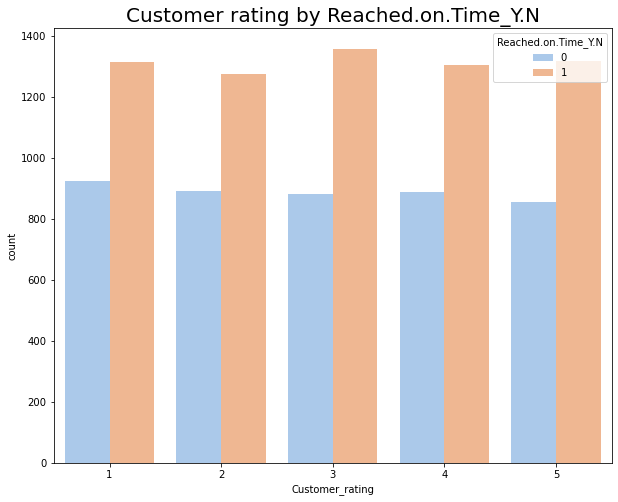

In [214]:
plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Customer_rating'], hue = shipping['Reached.on.Time_Y.N'])
plt.title('Customer rating by Reached.on.Time_Y.N', fontsize=20)
plt.show()

## 평점별로 봐야겠음..

In [234]:
shipping = df.copy()

In [235]:
def rating_group(rating):
    if rating in [1, 2]:
        return 'Low'
    else:
        return 'High'

In [236]:
shipping['rating_group'] = shipping['Customer_rating'].apply(rating_group)

In [237]:
shipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,rating_group
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Low
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,High
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Low
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,High
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,Low
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,Low
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,High
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,Low


# 창고별 만족도

### countplot

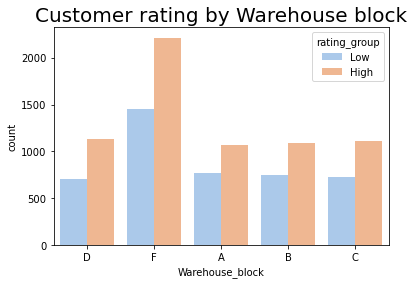

In [258]:
# plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Warehouse_block'], hue = shipping['rating_group'])
plt.title('Customer rating by Warehouse block', fontsize=20)
plt.show()

### pie chart

<Figure size 720x576 with 0 Axes>

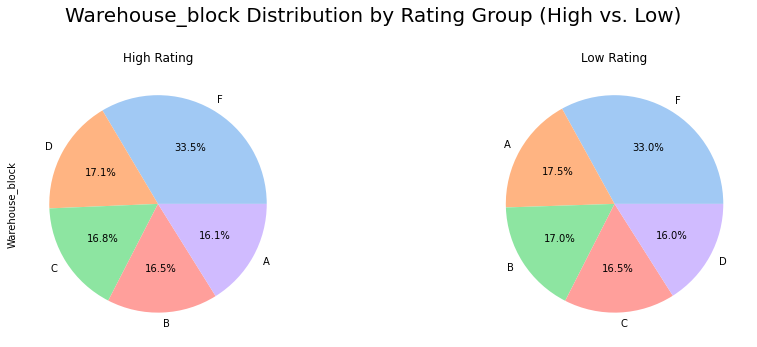

In [279]:
plt.figure(figsize=(10, 8))

# rating_group 별로 데이터 필터링
high_rating = shipping[shipping['rating_group'] == 'High']
low_rating = shipping[shipping['rating_group'] == 'Low']

# Warehouse_block에 따른 각 rating_group의 빈도수 계산
high_counts = high_rating['Warehouse_block'].value_counts(normalize=True)
low_counts = low_rating['Warehouse_block'].value_counts(normalize=True)

# 파이차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# High Rating의 Warehouse_block 비율 파이차트
high_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title("High Rating")

# Low Rating의 Warehouse_block 비율 파이차트
low_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title("Low Rating")

plt.suptitle('Warehouse_block Distribution by Rating Group (High vs. Low)', fontsize=20 , y=1.05)
plt.show()

# 배송방식

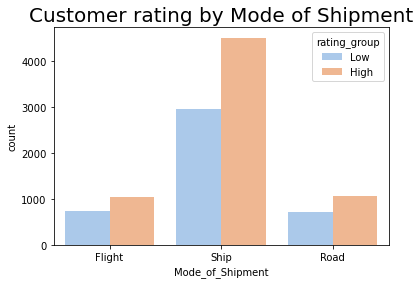

In [280]:
# plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Mode_of_Shipment'], hue = shipping['rating_group'])
plt.title('Customer rating by Mode of Shipment', fontsize=20)
plt.show()

<Figure size 720x576 with 0 Axes>

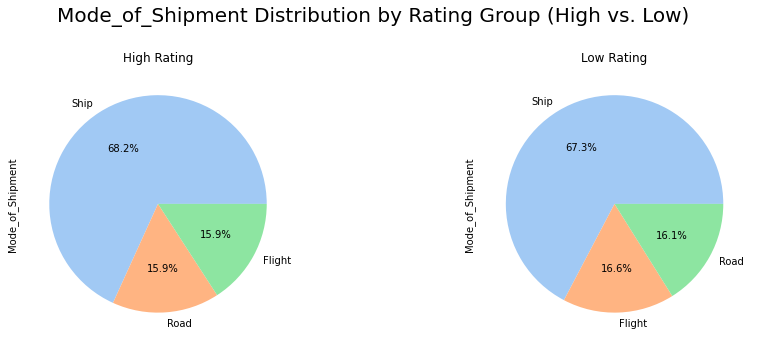

In [274]:
plt.figure(figsize=(10, 8))

# rating_group 별로 데이터 필터링
high_rating = shipping[shipping['rating_group'] == 'High']
low_rating = shipping[shipping['rating_group'] == 'Low']

# Warehouse_block에 따른 각 rating_group의 빈도수 계산
high_counts = high_rating['Mode_of_Shipment'].value_counts(normalize=True)
low_counts = low_rating['Mode_of_Shipment'].value_counts(normalize=True)

# 파이차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# High Rating의 Warehouse_block 비율 파이차트
high_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title("High Rating")

# Low Rating의 Warehouse_block 비율 파이차트
low_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title("Low Rating")

plt.suptitle('Mode_of_Shipment Distribution by Rating Group (High vs. Low)', fontsize=20 , y=1.05)
plt.show()

## 전화횟수

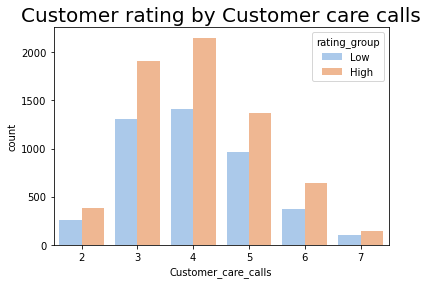

In [282]:
# plt.figure(figsize=(10, 8))
sns.countplot(x = shipping['Customer_care_calls'], hue = shipping['rating_group'])
plt.title('Customer rating by Customer care calls', fontsize=20)
plt.show()

<Figure size 720x576 with 0 Axes>

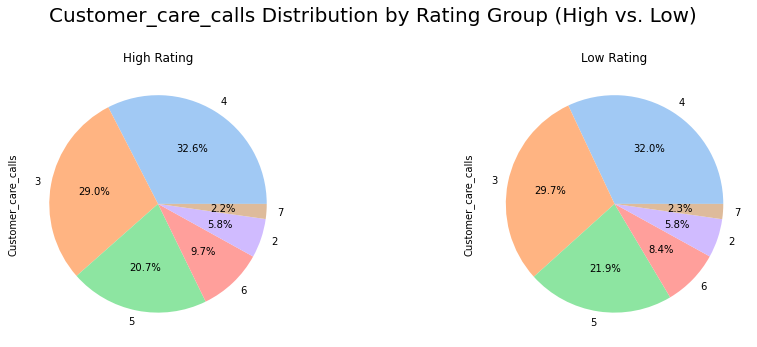

In [275]:
plt.figure(figsize=(10, 8))

# rating_group 별로 데이터 필터링
high_rating = shipping[shipping['rating_group'] == 'High']
low_rating = shipping[shipping['rating_group'] == 'Low']

# Warehouse_block에 따른 각 rating_group의 빈도수 계산
high_counts = high_rating['Customer_care_calls'].value_counts(normalize=True)
low_counts = low_rating['Customer_care_calls'].value_counts(normalize=True)

# 파이차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# High Rating의 Warehouse_block 비율 파이차트
high_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title("High Rating")

# Low Rating의 Warehouse_block 비율 파이차트
low_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title("Low Rating")

plt.suptitle('Customer_care_calls Distribution by Rating Group (High vs. Low)', fontsize=20 , y=1.05)
plt.show()

## 가격별

In [ ]:
df['Cost_of_the_Product']

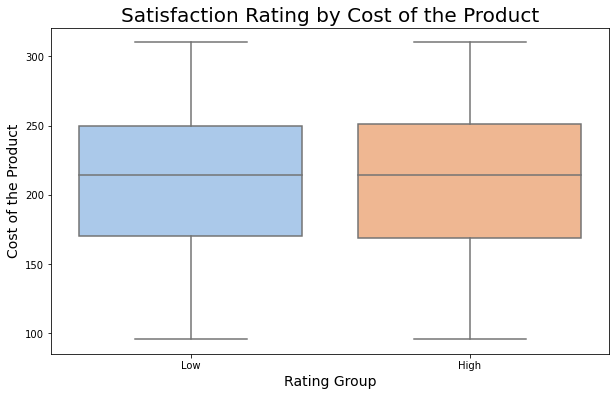

In [283]:
# box plot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_group', y='Cost_of_the_Product', data=shipping)
plt.title('Satisfaction Rating by Cost of the Product', fontsize=20)
plt.xlabel('Rating Group', fontsize=14)
plt.ylabel('Cost of the Product', fontsize=14)
plt.show()

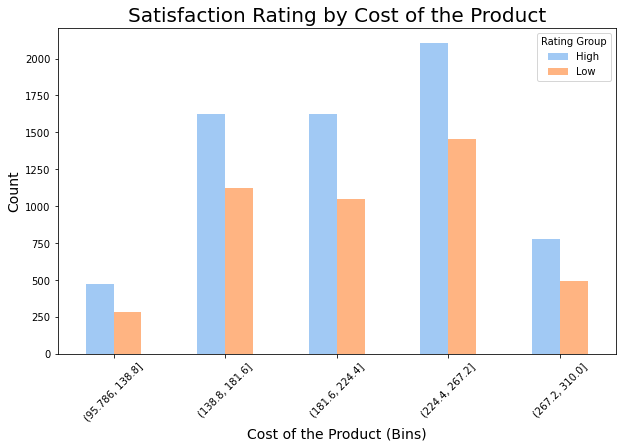

In [284]:
# 'Cost_of_the_Product'을 구간으로 나누기
shipping['Cost_bin'] = pd.cut(shipping['Cost_of_the_Product'], bins=5)

# 구간별 'rating_group'의 합계 계산
grouped = shipping.groupby(['Cost_bin', 'rating_group']).size().unstack()

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Rating by Cost of the Product', fontsize=20)
plt.xlabel('Cost of the Product (Bins)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Rating Group')
plt.show()

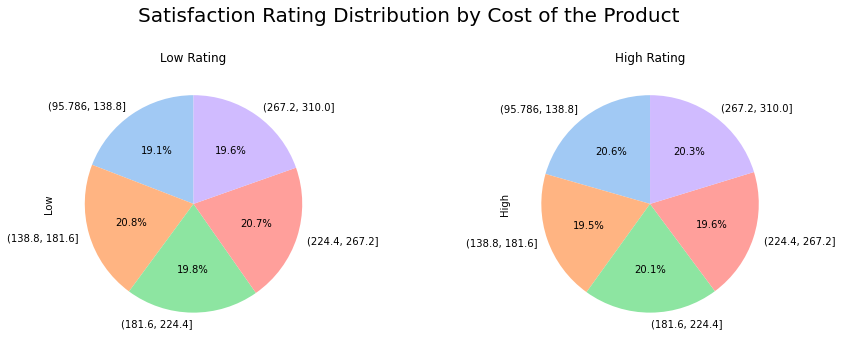

In [287]:
# 파이차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 첫 번째 파이차트: 첫 번째 rating_group
grouped_percentage['Low'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Low Rating')

# 두 번째 파이차트: 두 번째 rating_group
grouped_percentage['High'].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('High Rating')

# 전체 그래프 제목 추가
plt.suptitle('Satisfaction Rating Distribution by Cost of the Product', fontsize=20, y=1.05)
plt.show()